<a href="https://colab.research.google.com/github/anyuanay/info212/blob/main/INFO212_Assignment3_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drexel University
## College of Computing and Informatics
## INFO 212: Data Science Programming I
## Assignment 3 Answers



## Question 1 [20 marks]: Wikipedia has a Webpage: [List of countries by past and future population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population). On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Write Python code to use `requests` to read in the tables. Write programs to answer the following questions.
1. How many tables have you read in? List the columns of the DataFrames that contain the population data.
2.For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.
3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?
4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result.
6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

# Answers:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import requests
import seaborn as sns

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population"

In [ ]:
html = requests.get(url)

In [ ]:
tables = pd.read_html(html.text)

1. How many tables have you read in? List the columns of the DataFrames that contain the population data.


In [ ]:
# The number of tables read in
len(tables)

5

In [ ]:
tables[1].columns

Index(['Country (or dependent territory)', '1950', '1955', '%', '1960', '%.1',
       '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5'],
      dtype='object')

In [ ]:
tables[2].columns

Index(['Country (or dependent territory)', '1985', '%', '1990', '%.1', '1995',
       '%.2', '2000', '%.3', '2005', '%.4', '2010', '%.5', '2015', '%.6'],
      dtype='object')

In [ ]:
tables[3].columns

Index(['Country (or dependent territory)', '2020', '%', '2025', '%.1', '2030',
       '%.2', '2035', '%.3', '2040', '%.4', '2045', '%.5', '2050', '%.6'],
      dtype='object')

2. For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.

In [ ]:
tables[1].columns = ['country', '1950', '1955', '1955AAG', '1960', '1960AAG',
       '1965', '1965AAG', '1970', '1970AAG', '1975', '1975AAG', '1980', '1980AAG']

In [ ]:
tables[1].head()

,country,1950,1955,1955AAG,1960,1960AAG,1965,1965AAG,1970,1970AAG,1975,1975AAG,1980,1980AAG
0,Afghanistan,8151,8892,1.76,9830,2.03,10998,2.27,12431,2.48,14133,2.60,15045,1.26
1,Albania,1228,1393,2.56,1624,3.12,1884,3.02,2157,2.74,2402,2.17,2672,2.16
2,Algeria,8893,9842,2.05,10910,2.08,11964,1.86,13932,3.09,16141,2.99,18807,3.10
3,American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.80
4,Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81


In [ ]:
tables[2].columns = ['country', '1985', '1985AAG', '1990', '1990AAG', '1995',
       '1995AAG', '2000', '2000AAG', '2005', '2005AAG', '2010', '2010AAG', '2015', '2015AAG']

In [ ]:
tables[3].columns = ['country', '2020', '2020AAG', '2025', '2025AAG', '2030',
       '2030AAG', '2035', '2035AAG', '2040', '2040AAG', '2045', '2045AAG', '2050', '2050AAG']

3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?

In [ ]:
# Create a DataFrame containing all the data from the population tables
# This has to be done by joining on country names
df1 = pd.merge(tables[1], tables[2], left_on="country", right_on="country")
df = pd.merge(df1, tables[3], left_on="country", right_on="country")

In [ ]:
df.columns

Index(['country', '1950', '1955', '1955AAG', '1960', '1960AAG', '1965',
       '1965AAG', '1970', '1970AAG', '1975', '1975AAG', '1980', '1980AAG',
       '1985', '1985AAG', '1990', '1990AAG', '1995', '1995AAG', '2000',
       '2000AAG', '2005', '2005AAG', '2010', '2010AAG', '2015', '2015AAG',
       '2020', '2020AAG', '2025', '2025AAG', '2030', '2030AAG', '2035',
       '2035AAG', '2040', '2040AAG', '2045', '2045AAG', '2050', '2050AAG'],
      dtype='object')

In [ ]:
df.shape

(227, 42)

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/courses/INFO212/assignments/country_populations_1955_2050.csv"

In [ ]:
df.to_csv(path, index=None)

4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result: ![](https://i.imgur.com/6W9RuZO.png)

In [ ]:
top_10 = df.sort_values(by='1950', ascending=False)[1:11]
top_10

,country,1950,1955,1955AAG,1960,1960AAG,1965,1965AAG,1970,1970AAG,...,2030,2030AAG,2035,2035AAG,2040,2040AAG,2045,2045AAG,2050,2050AAG
40,China,562580,607047,1.53,651340,1.42,716667,1.93,822116,2.78,...,1419019,0.54,1424558,0.49,1428383,0.44,1433211,0.41,1437978,0.36
89,India,369881,404268,1.79,445394,1.96,494964,2.13,553889,2.28,...,1460744,0.91,1519491,0.79,1571716,0.68,1617238,0.57,1656554,0.48
214,United States,151869,165070,1.68,179980,1.74,193527,1.46,203985,1.06,...,359403,0.69,370339,0.60,380220,0.53,389395,0.48,398329,0.45
164,Russia,101937,111126,1.74,119632,1.49,126542,1.13,130246,0.58,...,139525,-0.28,137232,-0.28,135676,-0.27,133880,-0.31,131773,-0.38
99,Japan,83806,89816,1.39,94092,0.93,98883,1.00,104345,1.08,...,120752,-0.43,117747,-0.50,114449,-0.57,110907,-0.63,107210,-0.68
90,Indonesia,82979,90255,1.70,100146,2.10,110754,2.03,122292,2.00,...,296450,1.60,305653,1.47,314085,1.33,321524,1.24,327282,0.91
72,Germany,68375,70196,0.53,72481,0.64,75639,0.86,77784,0.56,...,78022,-0.31,76590,-0.37,74984,-0.42,73277,-0.46,71542,-0.48
26,Brazil,53444,61652,2.90,71412,2.98,82602,2.95,94931,2.82,...,228720,0.51,233068,0.39,236077,0.27,237826,0.18,238390,0.11
213,United Kingdom,50128,50947,0.32,52373,0.55,54351,0.74,55633,0.47,...,68451,0.36,69394,0.27,70149,0.22,70743,0.17,71154,0.12
96,Italy,47106,48634,0.64,50198,0.64,51988,0.70,53662,0.64,...,62623,0.01,62531,-0.03,62139,-0.07,61957,-0.12,61416,-0.18


In [ ]:
top_10.columns

Index(['country', '1950', '1955', '1955AAG', '1960', '1960AAG', '1965',
       '1965AAG', '1970', '1970AAG', '1975', '1975AAG', '1980', '1980AAG',
       '1985', '1985AAG', '1990', '1990AAG', '1995', '1995AAG', '2000',
       '2000AAG', '2005', '2005AAG', '2010', '2010AAG', '2015', '2015AAG',
       '2020', '2020AAG', '2025', '2025AAG', '2030', '2030AAG', '2035',
       '2035AAG', '2040', '2040AAG', '2045', '2045AAG', '2050', '2050AAG'],
      dtype='object')

In [ ]:
top_10_pop = top_10[['country', '1950', '1955', '1960', '1965', \
       '1970', '1975','1980', \
       '1985', '1990', '1995', '2000', \
       '2005', '2010', '2015', \
       '2020',  '2025', '2030', '2035', \
       '2040',  '2045',  '2050']]

In [ ]:
top_10_pop.head()

,country,1950,1955,1960,1965,1970,1975,1980,1985,1990,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
40,China,562580,607047,651340,716667,822116,920295,987822,1061876,1153164,...,1302285,1336681,1367486,1397026,1410807,1419019,1424558,1428383,1433211,1437978
89,India,369881,404268,445394,494964,553889,618923,684888,759613,838159,...,1090974,1173109,1251696,1326094,1396047,1460744,1519491,1571716,1617238,1656554
214,United States,151869,165070,179980,193527,203985,215466,227225,237924,249623,...,295517,309348,321369,334504,347335,359403,370339,380220,389395,398329
164,Russia,101937,111126,119632,126542,130246,134294,139039,143938,147973,...,143320,142527,142424,145723,141120,139525,137232,135676,133880,131773
99,Japan,83806,89816,94092,98883,104345,111574,116808,120755,123538,...,127716,127580,126920,126138,123366,120752,117747,114449,110907,107210


In [ ]:
# Set the country as the index
top_10_pop_country = top_10_pop.set_index('country')

In [ ]:
# Switch row and column
top_10_pop_country = top_10_pop_country.stack().unstack(0)

In [ ]:
top_10_pop_country.head(10)

country,China,India,United States,Russia,Japan,Indonesia,Germany,Brazil,United Kingdom,Italy
1950,562580,369881,151869,101937,83806,82979,68375,53444,50128,47106
1955,607047,404268,165070,111126,89816,90255,70196,61652,50947,48634
1960,651340,445394,179980,119632,94092,100146,72481,71412,52373,50198
1965,716667,494964,193527,126542,98883,110754,75639,82602,54351,51988
1970,822116,553889,203985,130246,104345,122292,77784,94931,55633,53662
1975,920295,618923,215466,134294,111574,135214,78683,107328,56216,55572
1980,987822,684888,227225,139039,116808,150322,78298,121064,56315,56452
1985,1061876,759613,237924,143938,120755,166070,77685,135734,56585,56719
1990,1153164,838159,249623,147973,123538,181600,79381,149410,57411,56714
1995,1221056,920585,266279,148759,125328,197604,81654,161912,58187,57295


In [ ]:
top_10_pop_country.shape

(21, 10)

In [ ]:
years= top_10_pop_country.index

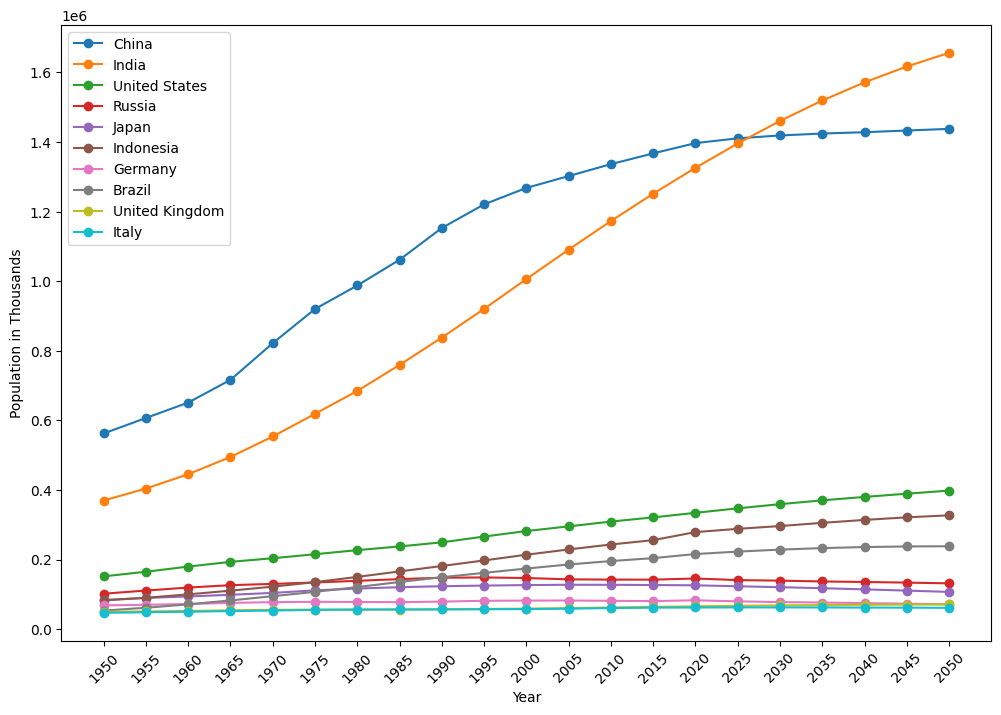

In [ ]:
ax  = top_10_pop_country.plot.line(figsize=(12, 8), marker = 'o')
ax.set_xticks(range(21))
ax.set_xticklabels(years, rotation = 45)
ax.set_xlabel('Year')
ax.set_ylabel('Population in Thousands')
ax.legend(loc='best')

### Alternative Solution:

In [ ]:
# Set the country as the index
top_10_pop_country_alt = top_10_pop.set_index('country')

In [ ]:
top_10_pop_country_alt = top_10_pop_country_alt.T

In [ ]:
top_10_pop_country_alt.head()

country,China,India,United States,Russia,Japan,Indonesia,Germany,Brazil,United Kingdom,Italy
1950,562580,369881,151869,101937,83806,82979,68375,53444,50128,47106
1955,607047,404268,165070,111126,89816,90255,70196,61652,50947,48634
1960,651340,445394,179980,119632,94092,100146,72481,71412,52373,50198
1965,716667,494964,193527,126542,98883,110754,75639,82602,54351,51988
1970,822116,553889,203985,130246,104345,122292,77784,94931,55633,53662


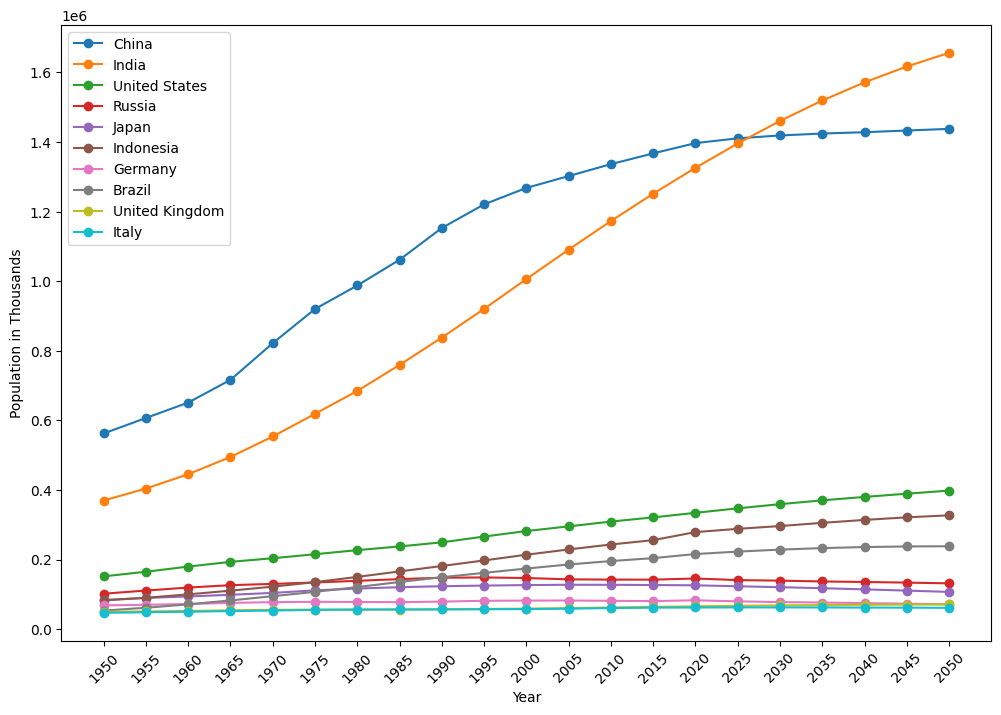

In [ ]:
# For the top 10 most populous countries at 1950, plot
# their population data from 1950-2050 (in 5-year interval).
ax  = top_10_pop_country_alt.plot.line(figsize=(12, 8), marker = 'o')
ax.set_xticks(range(21))
ax.set_xticklabels(years, rotation = 45)
ax.set_xlabel('Year')
ax.set_ylabel('Population in Thousands')
ax.legend(loc='best')

5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result: ![](https://i.imgur.com/ImXjIo0.png)

In [ ]:
top_10 = df.sort_values(by='1950', ascending=False)[1:11]
top_10

,country,1950,1955,1955AAG,1960,1960AAG,1965,1965AAG,1970,1970AAG,...,2030,2030AAG,2035,2035AAG,2040,2040AAG,2045,2045AAG,2050,2050AAG
40,China,562580,607047,1.53,651340,1.42,716667,1.93,822116,2.78,...,1419019,0.54,1424558,0.49,1428383,0.44,1433211,0.41,1437978,0.36
89,India,369881,404268,1.79,445394,1.96,494964,2.13,553889,2.28,...,1460744,0.91,1519491,0.79,1571716,0.68,1617238,0.57,1656554,0.48
214,United States,151869,165070,1.68,179980,1.74,193527,1.46,203985,1.06,...,359403,0.69,370339,0.60,380220,0.53,389395,0.48,398329,0.45
164,Russia,101937,111126,1.74,119632,1.49,126542,1.13,130246,0.58,...,139525,-0.28,137232,-0.28,135676,-0.27,133880,-0.31,131773,-0.38
99,Japan,83806,89816,1.39,94092,0.93,98883,1.00,104345,1.08,...,120752,-0.43,117747,-0.50,114449,-0.57,110907,-0.63,107210,-0.68
90,Indonesia,82979,90255,1.70,100146,2.10,110754,2.03,122292,2.00,...,296450,1.60,305653,1.47,314085,1.33,321524,1.24,327282,0.91
72,Germany,68375,70196,0.53,72481,0.64,75639,0.86,77784,0.56,...,78022,-0.31,76590,-0.37,74984,-0.42,73277,-0.46,71542,-0.48
26,Brazil,53444,61652,2.90,71412,2.98,82602,2.95,94931,2.82,...,228720,0.51,233068,0.39,236077,0.27,237826,0.18,238390,0.11
213,United Kingdom,50128,50947,0.32,52373,0.55,54351,0.74,55633,0.47,...,68451,0.36,69394,0.27,70149,0.22,70743,0.17,71154,0.12
96,Italy,47106,48634,0.64,50198,0.64,51988,0.70,53662,0.64,...,62623,0.01,62531,-0.03,62139,-0.07,61957,-0.12,61416,-0.18


In [ ]:
top_10_aag = top_10[['country', '1955AAG',
       '1960AAG', '1965AAG', '1970AAG',  '1975AAG',
        '1980AAG', '1985AAG', '1990AAG',
       '1995AAG', '2000AAG',  '2005AAG', '2010AAG',
        '2015AAG',  '2020AAG',  '2025AAG',
       '2030AAG',  '2035AAG',  '2040AAG',  '2045AAG',
        '2050AAG']]

In [ ]:
top_10_aag.set_index('country', inplace = True)

In [ ]:
top_10_aag = top_10_aag.T

In [ ]:
top_10_aag.head()

country,China,India,United States,Russia,Japan,Indonesia,Germany,Brazil,United Kingdom,Italy
1955AAG,1.53,1.79,1.68,1.74,1.39,1.70,0.53,2.90,0.32,0.64
1960AAG,1.42,1.96,1.74,1.49,0.93,2.10,0.64,2.98,0.55,0.64
1965AAG,1.93,2.13,1.46,1.13,1.00,2.03,0.86,2.95,0.74,0.70
1970AAG,2.78,2.28,1.06,0.58,1.08,2.00,0.56,2.82,0.47,0.64
1975AAG,2.28,2.25,1.10,0.61,1.35,2.03,0.23,2.49,0.21,0.70


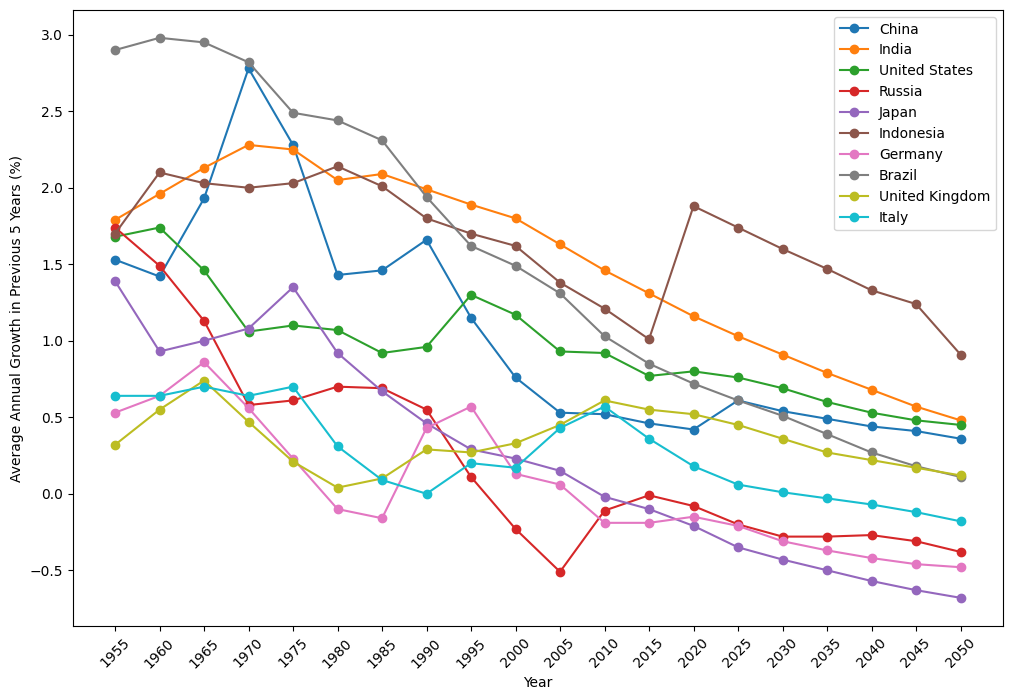

In [ ]:
# For the same top 10 most populous contries at 1950, plot
# the average annual growth for each previous five-year period
# starting from 1955 to 2050 in 5-year interval.
ax  = top_10_aag.plot.line(figsize=(12, 8), marker = 'o')
ax.set_xticks(range(20))
ax.set_xticklabels(years[1:], rotation = 45)
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Growth in Previous 5 Years (%)')
ax.legend(loc='best')

### Alternatively, the above transpose can be done using stack() and unstack() as in q4.

6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
- Hint: install the pycountry_convert package and use its methods for converting country names to continent names: https://pypi.org/project/pycountry-convert/

In [ ]:
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 30.9 MB/s eta 0:00:00


In [ ]:
import pycountry_convert as cc

In [ ]:
def get_continent(col):
    try:
        cn_a2_code =  cc.country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown'
    try:
        cn_continent = cc.country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown'
    return cn_continent

In [ ]:
conts = df.country.apply(get_continent)

In [ ]:
conts

0           AS
1           EU
2           AF
3           OC
4           EU
        ...   
222    Unknown
223         AS
224         AF
225         AF
226    Unknown
Name: country, Length: 227, dtype: object

In [ ]:
df.head(1)

,country,1950,1955,1955AAG,1960,1960AAG,1965,1965AAG,1970,1970AAG,...,2030,2030AAG,2035,2035AAG,2040,2040AAG,2045,2045AAG,2050,2050AAG
0,Afghanistan,8151,8892,1.76,9830,2.03,10998,2.27,12431,2.48,...,45665,2.12,50195,1.91,54717,1.74,59256,1.61,63796,1.49


In [ ]:
cont_pops = df.iloc[:, 1:].groupby(conts).mean().iloc[:6]
cont_pops

,1950,1955,1955AAG,1960,1960AAG,1965,1965AAG,1970,1970AAG,1975,...,2030,2030AAG,2035,2035AAG,2040,2040AAG,2045,2045AAG,2050,2050AAG
country,,,,,,,,,,,,,,,,,,,,,
AF,4165.054545,4632.000000,1.911818,5196.000000,2.122727,5860.745455,2.236727,6653.545455,2.474909,7566.381818,...,29693.054545,1.815818,32445.363636,1.681091,35326.854545,1.552000,38690.254545,1.425455,41970.745455,1.300000
AS,28743.200000,31348.600000,2.461000,34399.740000,2.950600,38232.220000,3.131400,43172.380000,3.006800,48261.460000,...,97881.360000,0.842000,100728.800000,0.695000,103267.640000,0.568600,105480.360000,0.450000,107386.100000,0.326600
EU,11383.500000,11967.791667,0.924583,12597.666667,1.145833,13216.708333,1.275833,13682.354167,1.029792,14110.312500,...,15553.604167,-0.045833,15442.958333,-0.148958,15311.458333,-0.231875,15144.833333,-0.307917,14930.895833,-0.383333
NA,6110.972222,6743.055556,2.070000,7480.416667,2.165556,8213.305556,2.093056,8887.888889,2.011944,9588.277778,...,17649.472222,0.458889,18177.555556,0.317222,18629.666667,0.189722,19015.666667,0.079722,19348.944444,-0.009722
OC,594.619048,665.714286,2.383333,743.809524,2.374286,827.095238,2.636667,916.333333,2.558095,1006.095238,...,2052.380952,0.494286,2129.380952,0.396190,2197.523810,0.306667,2257.619048,0.224286,2310.809524,0.144762
SA,9280.500000,10620.416667,2.635833,12183.833333,2.731667,13949.500000,2.628333,15860.083333,2.395000,17849.250000,...,38667.666667,0.747500,39661.083333,0.610833,40431.250000,0.476667,41013.500000,0.362500,41412.500000,0.264167


In [ ]:
pops = cont_pops[['1950', '1955', '1960', '1965', \
       '1970', '1975','1980', \
       '1985', '1990', '1995', '2000', \
       '2005', '2010', '2015', \
       '2020',  '2025', '2030', '2035', \
       '2040',  '2045',  '2050']]

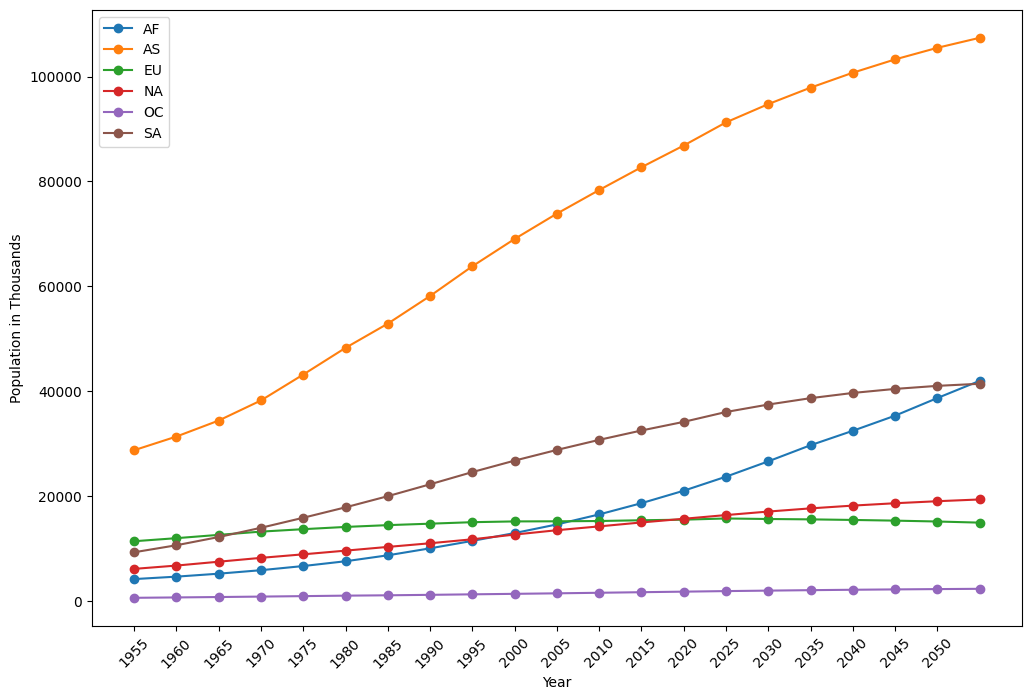

In [ ]:
ax  = pops.T.plot.line(figsize=(12, 8), marker = 'o')
ax.set_xticks(range(20))
ax.set_xticklabels(years[1:], rotation = 45)
ax.set_xlabel('Year')
ax.set_ylabel('Population in Thousands')
ax.legend(loc='best')

In [ ]:
aags = cont_pops[['1955AAG',
       '1960AAG', '1965AAG', '1970AAG',  '1975AAG',
        '1980AAG', '1985AAG', '1990AAG',
       '1995AAG', '2000AAG',  '2005AAG', '2010AAG',
        '2015AAG',  '2020AAG',  '2025AAG',
       '2030AAG',  '2035AAG',  '2040AAG',  '2045AAG',
        '2050AAG']]

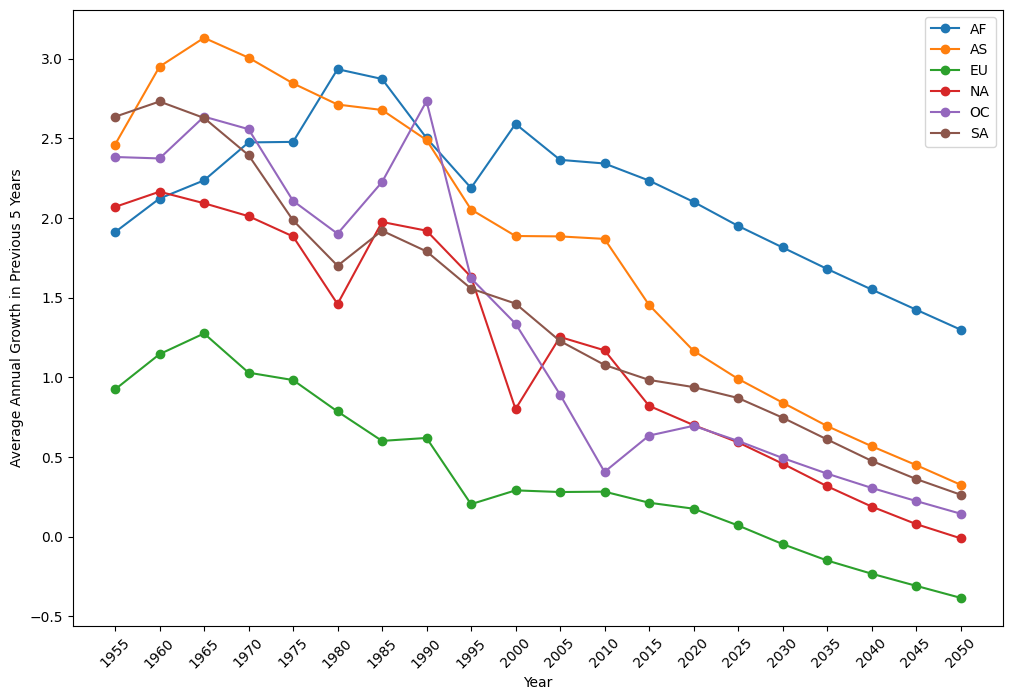

In [ ]:
ax  = aags.T.plot.line(figsize=(12, 8), marker = 'o')
ax.set_xticks(range(20))
ax.set_xticklabels(years[1:], rotation = 45)
ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Growth in Previous 5 Years')
ax.legend(loc='best')

7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

In [ ]:
# Function to calculate growth rate over a period
def calculate_growth_rate(initial_population, final_population, periods):
    return (final_population / initial_population) ** (1 / periods) - 1

In [ ]:
# Calculate the growth rate for each country from 1950 to 2020
df['1950_2020_GR'] = calculate_growth_rate(
    df['1950'],
    df['2020'],
    periods=(2020-1950) / 5  # Number of 5-year periods from 1950 to 2020
)

# Sort the countries by this growth rate
top_5_growth_1950_2020 = df[['country', '1950_2020_GR']].sort_values(by='1950_2020_GR', ascending=False).head(5)

In [ ]:
top_5_growth_1950_2020

,country,1950_2020_GR
161,Qatar,0.383408
212,United Arab Emirates,0.379321
222,Western Sahara,0.347835
106,Kuwait,0.241424
182,Sint Maarten,0.211461


In [ ]:
# Calculate the growth rate for each country from 2020 to 2050
df['2020_2050_GR'] = calculate_growth_rate(
    df['2020'],
    df['2050'],
    periods=(2050-2020) / 5  # Number of 5-year periods from 2020 to 2050
)

In [ ]:
# Get the average growth rates the top 5 countries from 1950 to 2020
df[df.country.isin(top_5_growth_1950_2020.country)][['country', '1950_2020_GR', '2020_2050_GR']].sort_values(by='1950_2020_GR', ascending=False)

,country,1950_2020_GR,2020_2050_GR
161,Qatar,0.383408,0.007624
212,United Arab Emirates,0.379321,0.035728
222,Western Sahara,0.347835,0.102705
106,Kuwait,0.241424,0.043432
182,Sint Maarten,0.211461,0.034722


Discussion: Comparing the 1950-2020 growth rates to the projected growth rates from 2020 to 2050, we see a significant decrease. For instance, Qatar's growth rate is projected to slow to 0.76% over each 5-year period from 2020 to 2050. There could be multiple factors:

 - Fertility rates: A decline in fertility rates can lead to a lower growth rate.
 - Economic conditions: Economic prosperity or downturns can influence birth rates and migration patterns.
 - Environmental factors: Climate change, natural resources, and environmental sustainability can affect population distributions and growth.

Notable differences in growth rates may be due to transitions in these factors. For example, countries with high growth rates in the past might experience slower growth due to economic changes, shifts in government policies, or demographic transitions like aging populations.​

## Question 2 [40 marks]: The link: https://yuan-json-api.vercel.app/nobelprize/laureates is a RESTful API endpoint that returns information in JSON about Nobel Prize Laureates. Write Python code to use `requests` to call the RESTful API and read the JSON results. Write program to answer the following questions.
1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

# Answers:

1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

In [ ]:
# Write your code below
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [ ]:
# URL of the RESTful API
url = "https://yuan-json-api.vercel.app/nobelprize/laureates"

# Make a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the JSON results into a DataFrame
    data = response.json()

    # Assuming the JSON data is a list of records, which is common for APIs
    laureates = pd.json_normalize(data['laureates'])
    print(laureates.head())  # Print the first few rows of the DataFrame
else:
    print(f"Failed to retrieve data: {response.status_code}")

  id       firstname    surname        born        died  \
0  1  Wilhelm Conrad    Röntgen  1845-03-27  1923-02-10   
1  2  Hendrik Antoon    Lorentz  1853-07-18  1928-02-04   
2  3          Pieter     Zeeman  1865-05-25  1943-10-09   
3  4   Antoine Henri  Becquerel  1852-12-15  1908-08-25   
4  5          Pierre      Curie  1859-05-15  1906-04-19   

             bornCountry bornCountryCode                bornCity  \
0  Prussia (now Germany)              DE  Lennep (now Remscheid)   
1        the Netherlands              NL                  Arnhem   
2        the Netherlands              NL              Zonnemaire   
3                 France              FR                   Paris   
4                 France              FR                   Paris   

       diedCountry diedCountryCode   diedCity gender  \
0          Germany              DE     Munich   male   
1  the Netherlands              NL        NaN   male   
2  the Netherlands              NL  Amsterdam   male   
3           

In [ ]:
laureates.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,prizes
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,"[{'year': '1901', 'category': 'physics', 'shar..."
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,"[{'year': '1902', 'category': 'physics', 'shar..."
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,"[{'year': '1902', 'category': 'physics', 'shar..."
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,"[{'year': '1903', 'category': 'physics', 'shar..."
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,"[{'year': '1903', 'category': 'physics', 'shar..."


In [ ]:
laureates[laureates.id == '6'].prizes.values

array([list([{'year': '1903', 'category': 'physics', 'share': '4', 'motivation': '"in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"', 'affiliations': [[]], 'id': '6'}, {'year': '1911', 'category': 'chemistry', 'share': '1', 'motivation': '"in recognition of her services to the advancement of chemistry by the discovery of the elements radium and polonium, by the isolation of radium and the study of the nature and compounds of this remarkable element"', 'affiliations': [{'name': 'Sorbonne University', 'city': 'Paris', 'country': 'France'}], 'id': '6'}])],
      dtype=object)

In [ ]:
laureates.shape

(922, 13)

In [ ]:
laureates.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,prizes
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,"[{'year': '1901', 'category': 'physics', 'shar..."
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,"[{'year': '1902', 'category': 'physics', 'shar..."
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,"[{'year': '1902', 'category': 'physics', 'shar..."
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,"[{'year': '1903', 'category': 'physics', 'shar..."
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,"[{'year': '1903', 'category': 'physics', 'shar..."


In [ ]:
data['laureates'][0]['prizes'][0]

{'year': '1901',
 'category': 'physics',
 'share': '1',
 'motivation': '"in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him"',
 'affiliations': [{'name': 'Munich University',
   'city': 'Munich',
   'country': 'Germany'}],
 'id': '1'}

In [ ]:
# Expanding the 'prizes' column into a separate DataFrame
prizes = pd.json_normalize(laureates['prizes'].explode()).dropna(subset=['year']).reset_index(drop=True)

In [ ]:
prizes.shape

(923, 7)

In [ ]:
prizes.id.nunique()

916

In [ ]:
# join the prizes with laureates on their id columns:
laureates_prizes = pd.merge(laureates, prizes, left_on='id', right_on='id', how='left')

In [ ]:
laureates_prizes = laureates_prizes.drop('prizes', axis=1)

In [ ]:
laureates_prizes.shape

(929, 18)

In [ ]:
# Who had mulitple prizes
dup_ids = laureates_prizes[laureates_prizes.id.duplicated()].id
dup_ids

6        6
66      66
215    217
221    222
480    482
481    482
514    515
Name: id, dtype: object

In [ ]:
laureates_prizes.id.nunique()

922

In [ ]:
# Initialize an empty list to collect the DataFrames
affiliations_frames = []

# Loop through each laureate and prize to normalize the affiliations
for index, row in laureates_prizes.iterrows():
    # If 'affiliations' is a non-empty list, we can normalize it
    if isinstance(row['affiliations'], list) and len(row['affiliations']) > 0:
        # Normalize the current row's affiliations
        current_affiliations = pd.json_normalize(row['affiliations'])
        # Add an identifier to match it back to the laureate and prize
        current_affiliations['affiliation_index'] = index
        # Append the current DataFrame to the list
        affiliations_frames.append(current_affiliations)

# Concatenate all the affiliation DataFrames into one DataFrame
affiliations_expanded = pd.concat(affiliations_frames, ignore_index=True)

In [ ]:
affiliations_expanded.head()

,name,city,country,affiliation_index
0,Munich University,Munich,Germany,0
1,Leiden University,Leiden,the Netherlands,1
2,Amsterdam University,Amsterdam,the Netherlands,2
3,École Polytechnique,Paris,France,3
4,École municipale de physique et de chimie indu...,Paris,France,4


In [ ]:
# Now, let's merge the expanded affiliations back with the laureates and prizes data
# We drop the original 'affiliations' column since it's nested
laureates_prizes_expanded = laureates_prizes.drop('affiliations', axis=1)

# Merge the data on the 'affiliation_index' we added
final_df = pd.merge(
    laureates_prizes_expanded,
    affiliations_expanded,
    how="left",
    left_index=True,
    right_on="affiliation_index"
)

In [ ]:
final_df = final_df.drop('affiliation_index', axis=1)

In [ ]:
final_df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,share,motivation,overallMotivation,name,city,country
0.0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901,physics,1,"""in recognition of the extraordinary services ...",NaN,Munich University,Munich,Germany
1.0,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902,physics,2,"""in recognition of the extraordinary service t...",NaN,Leiden University,Leiden,the Netherlands
2.0,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902,physics,2,"""in recognition of the extraordinary service t...",NaN,Amsterdam University,Amsterdam,the Netherlands
3.0,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903,physics,2,"""in recognition of the extraordinary services ...",NaN,École Polytechnique,Paris,France
4.0,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903,physics,4,"""in recognition of the extraordinary services ...",NaN,École municipale de physique et de chimie indu...,Paris,France


In [ ]:
# The number of unique laureates in the data
final_df.id.nunique()

922

2.Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.


In [ ]:
# Who had mulitple prizes
dup_ids = laureates_prizes[laureates_prizes.id.duplicated()].id
dup_ids.values

array(['6', '66', '217', '222', '482', '482', '515'], dtype=object)

In [ ]:
final_df[final_df.id.isin(dup_ids)][['id', 'firstname', 'surname', 'year', 'category']]

,id,firstname,surname,year,category
5.0,6,Marie,"Curie, née Sklodowska",1903,physics
6.0,6,Marie,"Curie, née Sklodowska",1911,chemistry
67.0,66,John,Bardeen,1956,physics
68.0,66,John,Bardeen,1972,physics
227.0,217,Linus Carl,Pauling,1954,chemistry
228.0,217,Linus Carl,Pauling,1962,peace
233.0,222,Frederick,Sanger,1958,chemistry
234.0,222,Frederick,Sanger,1980,chemistry
503.0,482,Comité international de la Croix Rouge (Intern...,NaN,1917,peace
504.0,482,Comité international de la Croix Rouge (Intern...,NaN,1944,peace


3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

In [ ]:
# With the final_df DataFrame restored, we can now proceed to list the top 5 affiliations by the number of awards

# Count the number of awards per affiliation name
affiliation_award_counts = final_df['name'].value_counts().head(5)

affiliation_award_counts

University of California                        34
Harvard University                              27
Massachusetts Institute of Technology (MIT)     19
California Institute of Technology (Caltech)    19
Stanford University                             18
Name: name, dtype: int64

In [ ]:
# Get the top 5 affiliation names
top_affiliations = affiliation_award_counts.index.tolist()

# Filter the final_df DataFrame for rows that have these top affiliations
top_affiliation_data = final_df[final_df['name'].isin(top_affiliations)]

# Select relevant columns to display laureates, prizes, and affiliation information
top_affiliation_info = top_affiliation_data[['id', 'firstname', 'surname', 'year', 'category', 'name', 'city', 'country']]

In [ ]:
# Display the top 5 affiliations with the most number of awards and the associated laureates and prizes
top_affiliation_info.sort_values(by='name')

,id,firstname,surname,year,category,name,city,country
27.0,28,Robert Andrews,Millikan,1923,physics,California Institute of Technology (Caltech),"Pasadena, CA",USA
808.0,795,Robert H.,Grubbs,2005,chemistry,California Institute of Technology (Caltech),"Pasadena, CA",USA
788.0,777,H. David,Politzer,2004,physics,California Institute of Technology (Caltech),"Pasadena, CA",USA
473.0,452,Edward B.,Lewis,1995,medicine,California Institute of Technology (Caltech),"Pasadena, CA",USA
443.0,422,Roger W.,Sperry,1981,medicine,California Institute of Technology (Caltech),"Pasadena, CA",USA
...,...,...,...,...,...,...,...,...
738.0,729,Alan J.,Heeger,2000,chemistry,University of California,"Santa Barbara, CA",USA
742.0,733,Daniel L.,McFadden,2000,economics,University of California,"Berkeley, CA",USA
753.0,744,George A.,Akerlof,2001,economics,University of California,"Berkeley, CA",USA
76.0,73,Owen,Chamberlain,1959,physics,University of California,"Berkeley, CA",USA


4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

<Axes: title={'center': 'Nobel Prize Category Counts for Top 5 Affiliations'}, xlabel='name'>

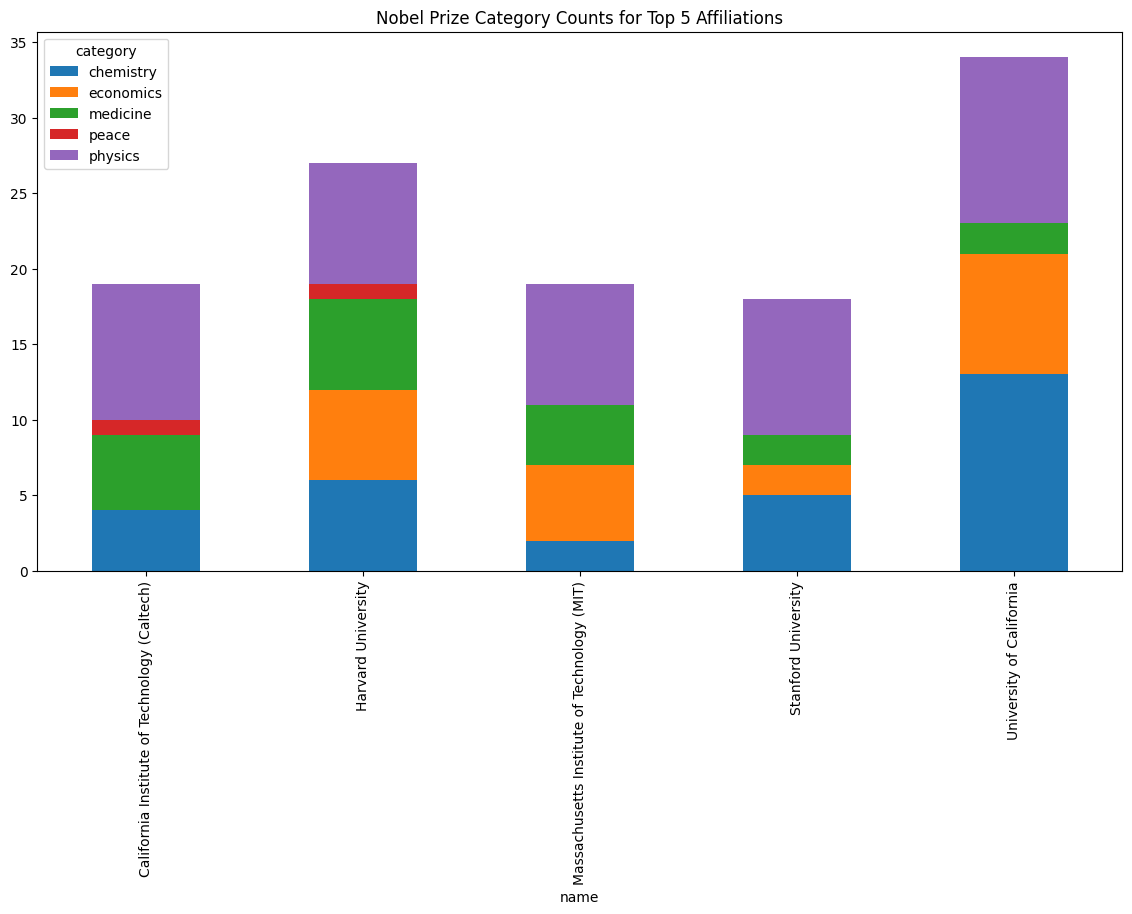

In [ ]:
# Filter final_df for only the top 5 affiliations
top_affiliation_prizes = final_df[final_df['name'].isin(top_affiliations)]

# Count the occurrences of each prize category within the top affiliations
top_affiliation_category_counts = top_affiliation_info.groupby(['name', 'category']).size().unstack(fill_value=0)

# Plot the counts of each category for the top 5 affiliations
top_affiliation_category_counts.plot(kind='bar', stacked=True, figsize=(14, 7), title='Nobel Prize Category Counts for Top 5 Affiliations')


## Question 3 [20 marks]: The file `weather-samples.csv` contains weather data measured at a weather station for a period of three years. Sensors at the weather station capture weather-related measurements such as air temperature, air pressure, and relative humidity. Load  the data to a pandas DataFrame. Write code to answer the following questions.

1. How many rows contain missing values?
2. How many columns contain missing values?
3. List the numbers of missing values for all columns.
4. For each missing value, fill up it with the mean value of the column where the missing value is located in.
5. Show there is no missing value after filling up.
6. Plot the histogram of the value `relative_humidity_3pm`.
7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving weather-samples.csv to weather-samples.csv


{'weather-samples.csv': b'number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm\r\n0,918.06,74.822,271.1,2.0803542,295.4,2.8632832,0,0,42.42,36.16\r\n1,917.3476881,71.40384263,101.9351794,2.443009216,140.4715485,3.533323602,0,0,24.32869729,19.4265968\r\n2,923.04,60.638,51,17.0678522,63.7,22.1009672,0,20,8.9,14.46\r\n3,920.5027512,70.13889487,198.8321327,4.337363056,211.2033412,5.19004536,0,0,12.18910187,12.74254735\r\n4,921.16,44.294,277.8,1.8566602,136.5,2.8632832,8.9,14730,92.41,76.74\r\n5,915.3,78.404,182.8,9.9320136,189,10.9833754,0.02,170,35.13,33.93\r\n6,915.5988675,70.04330432,177.8754072,3.745586538,186.6066959,4.589632429,0,0,10.65742166,21.38565673\r\n7,918.07,51.71,242.4,2.5277422,271.6,3.6462122,0,0,80.47,74.92\r\n8,920.08,80.582,40.7,4.5186188,63,5.8831522,0,0,29.58,24.03\r\n9,915.01,47.498,163.1,4.9436374,195.9,6.5766036,0,

In [ ]:
weather = pd.read_csv("weather-samples.csv", index_col=0)

In [ ]:
weather.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

1. How many rows contain missing values?

In [ ]:
# the number of rows containing missing values is:
(weather.isna().sum(axis=1) > 0).sum()

31

2. How many columns contain missing values?

In [ ]:
# The number of columns containing missing values is:
(weather.isna().sum(axis=0) > 0).sum()

8

3. List the numbers of missing values for all columns.

In [ ]:
weather.isna().sum()

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

4. For each missing value, fill up it with the mean value of the column where the missing value is located in.

In [ ]:
weather_filled = weather.fillna(weather.mean())

In [ ]:
weather_filled.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
number,,,,,,,,,,
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


5. Show there is no missing value after filling up.

In [ ]:
# The number of missing values in the dataset is:
weather_filled.isna().sum().sum()

0

6. Plot the histogram of the value `relative_humidity_3pm`.

(array([138., 354., 117.,  80.,  94., 110.,  75.,  41.,  40.,  46.]),
 array([ 5.3  , 13.995, 22.69 , 31.385, 40.08 , 48.775, 57.47 , 66.165,
        74.86 , 83.555, 92.25 ]),
 <a list of 10 Patch objects>)

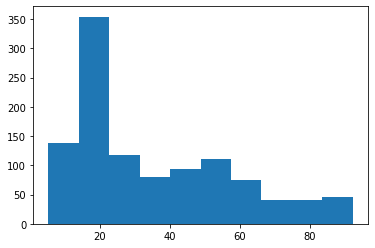

In [ ]:
plt.hist(weather['relative_humidity_3pm'])

7.A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

In [ ]:
cols = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

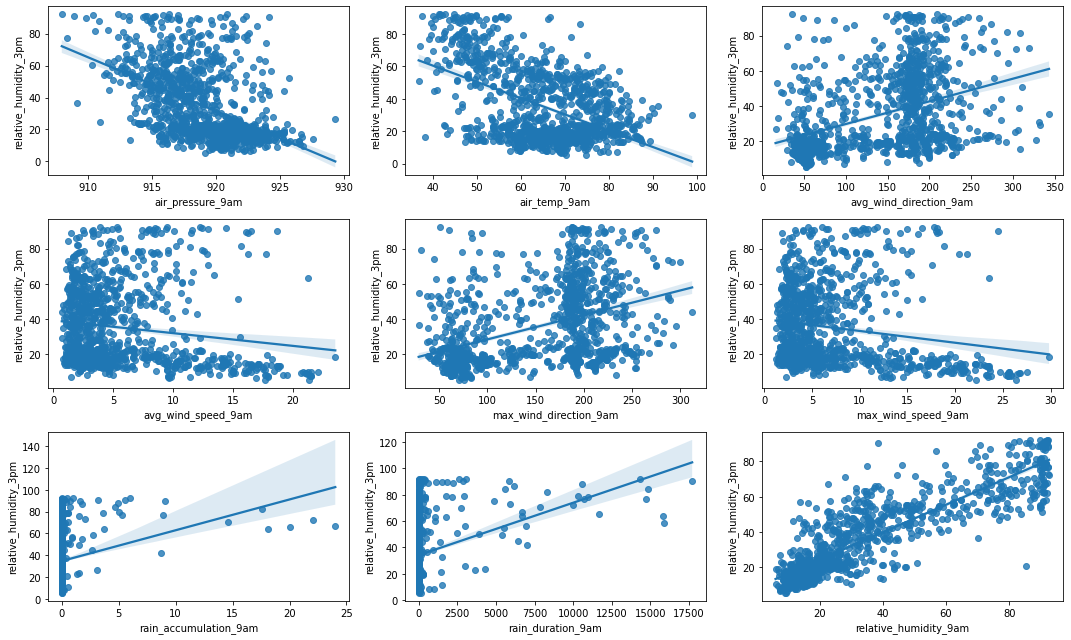

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 9))
for r in np.arange(3):
    for c in np.arange(3):
        depent = cols[3 * r + c]
        sns.regplot(ax=axes[r, c], x=depent, y='relative_humidity_3pm', data=weather)
plt.tight_layout()

# Discussion:
Discuss the correlations between every measure at 9am and the target variable 'relative_humidity_3pm'. Explain which measures have high impacts on the target variable. Which measure would be a good predictor for the target variable.

## Question 4 [20 marks]: Download the dataset: `activity-data.csv` and load it into a data frame. The data set contains the time series outputs of a wearable clinical device measuring a patient's activities. Write code to answer the following questions:
1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.
2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?
3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.
4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.
5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data
6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.
7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

Load and Overview the Data

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/courses/INFO212/assignments/patients_data/activity-data.csv"

In [ ]:
df = pd.read_csv(path, parse_dates=['Datetime'])

In [ ]:
df.head()

,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,XCnt,YCnt,ZCnt,Calories,Wear,WearSens
0,2016-06-22 09:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,0,0,0,0.0,True,3
1,2016-06-22 09:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,0,0,0,0.0,True,3
2,2016-06-22 09:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,0,0,0,0.0,True,3
3,2016-06-22 09:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,0,0,0,0.0,True,3
4,2016-06-22 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,0,0,0,0.0,True,3


In [ ]:
df.Steps.max(), df.Steps.min()

(85, 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31740 entries, 0 to 31739
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  31740 non-null  datetime64[ns]
 1   ACTDT     31740 non-null  object        
 2   Day       31740 non-null  float64       
 3   Week      29643 non-null  float64       
 4   Time      31740 non-null  object        
 5   Hour      31740 non-null  int64         
 6   Minute    31740 non-null  int64         
 7   Steps     31740 non-null  int64         
 8   XCnt      31740 non-null  int64         
 9   YCnt      31740 non-null  int64         
 10  ZCnt      31740 non-null  int64         
 11  Calories  31740 non-null  float64       
 12  Wear      31740 non-null  bool          
 13  WearSens  31740 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 3.2+ MB


In [ ]:
df.shape

(31740, 14)

In [ ]:
df.columns

Index(['Datetime', 'ACTDT', 'Day', 'Week', 'Time', 'Hour', 'Minute', 'Steps',
       'XCnt', 'YCnt', 'ZCnt', 'Calories', 'Wear', 'WearSens'],
      dtype='object')

1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.

In [ ]:
# The number of days the recordings span is
len(df.Day.unique())

23

In [ ]:
# The list of unique calendar dates in the recording time:
df.Datetime.dt.date.unique()

array([datetime.date(2016, 6, 22), datetime.date(2016, 6, 23),
       datetime.date(2016, 6, 24), datetime.date(2016, 6, 25),
       datetime.date(2016, 6, 26), datetime.date(2016, 6, 27),
       datetime.date(2016, 6, 28), datetime.date(2016, 6, 29),
       datetime.date(2016, 6, 30), datetime.date(2016, 7, 1),
       datetime.date(2016, 7, 2), datetime.date(2016, 7, 3),
       datetime.date(2016, 7, 4), datetime.date(2016, 7, 5),
       datetime.date(2016, 7, 6), datetime.date(2016, 7, 7),
       datetime.date(2016, 7, 8), datetime.date(2016, 7, 9),
       datetime.date(2016, 7, 10), datetime.date(2016, 7, 11),
       datetime.date(2016, 7, 12), datetime.date(2016, 7, 13),
       datetime.date(2016, 7, 14)], dtype=object)

2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?

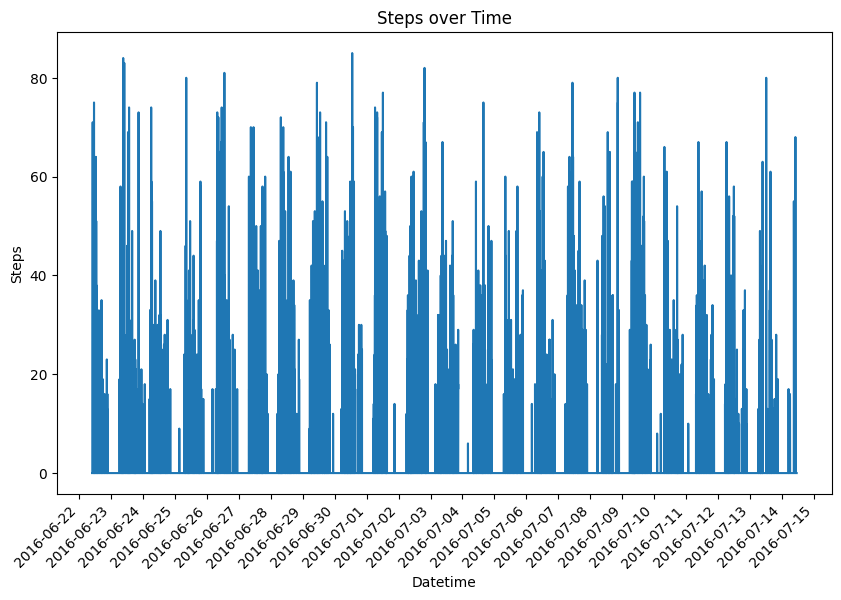

In [ ]:
import matplotlib.dates as mdates

# Sort your data based on 'Datetime'
df.sort_values('Datetime', inplace=True)

# Create a plot
plt.figure(figsize=(10,6))  # Adjust size as per need
plt.plot(df['Datetime'], df['Steps'])
plt.title('Steps over Time')
plt.xlabel('Datetime')
plt.ylabel('Steps')

# Adjust x-ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())  # display a tick for each day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format the date as 'YYYY-MM-DD'
plt.xticks(rotation=45, ha='right')  # rotate x-ticks 45 degrees


plt.show()

3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.

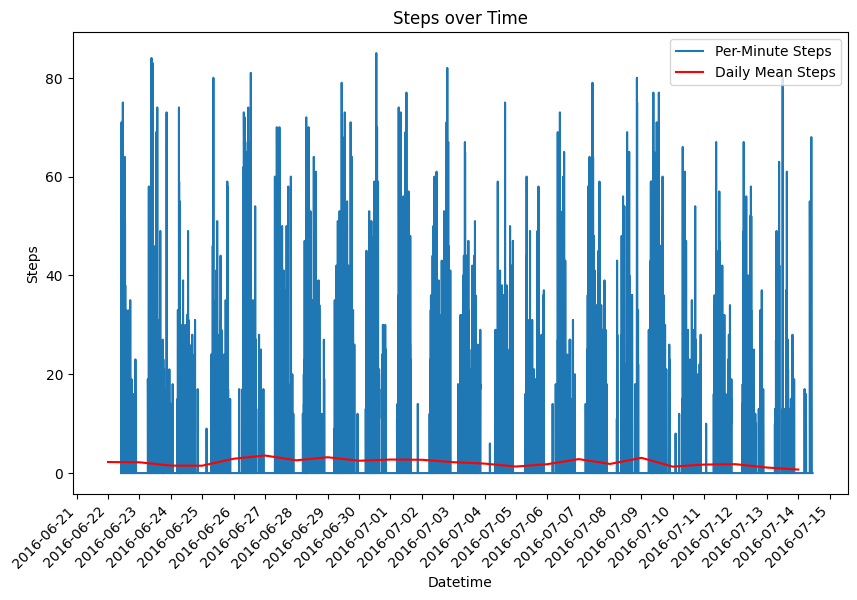

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that 'Datetime' is in the correct datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort your data based on 'Datetime'
df.sort_values('Datetime', inplace=True)

# Compute the daily mean steps
df_daily_mean = df.set_index('Datetime').resample('D')['Steps'].mean()

# Create a plot
fig, ax = plt.subplots(figsize=(10,6))  # Adjust size as per need

# Plot the per-minute steps
ax.plot(df['Datetime'], df['Steps'], label='Per-Minute Steps')

# Plot the daily mean steps
ax.plot(df_daily_mean.index, df_daily_mean, label='Daily Mean Steps', color='red')

ax.set_title('Steps over Time')
ax.set_xlabel('Datetime')
ax.set_ylabel('Steps')

# Adjust x-ticks
ax.xaxis.set_major_locator(mdates.DayLocator())  # display a tick for each day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format the date as 'YYYY-MM-DD'
plt.xticks(rotation=45, ha='right')  # rotate x-ticks 45 degrees and align to the right

plt.legend()  # Display the legend

plt.show()


4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.

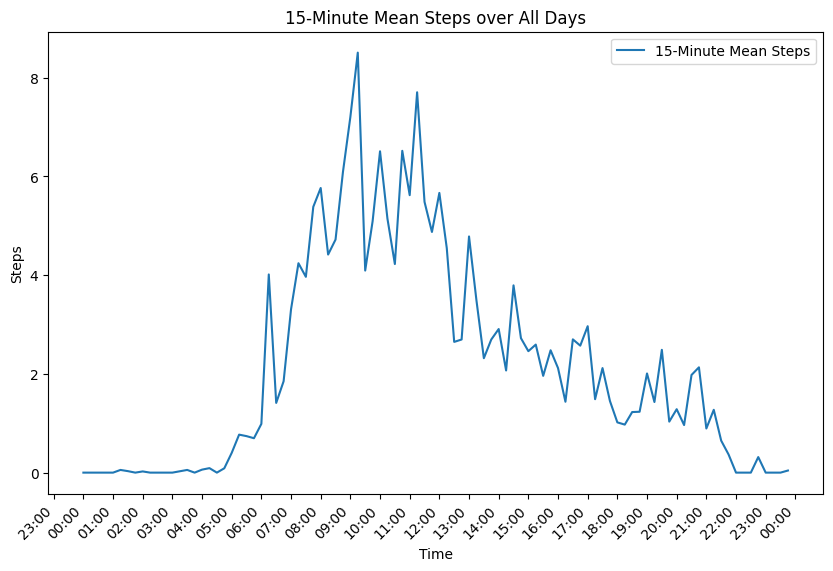

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_index = df.set_index('Datetime')

# Group by time and compute the mean steps for each minute
df_minute_mean = df.groupby(df_index.index.time)['Steps'].mean()

# Convert the index to a DatetimeIndex
df_minute_mean.index = pd.to_datetime(df_minute_mean.index, format='%H:%M:%S')

# Resample to compute mean steps every 15 minutes
df_15min_mean = df_minute_mean.resample('15T').mean()

# Create a plot
fig, ax = plt.subplots(figsize=(10,6))  # Adjust size as per need
ax.plot(df_15min_mean.index, df_15min_mean, label='15-Minute Mean Steps')

ax.set_title('15-Minute Mean Steps over All Days')
ax.set_xlabel('Time')
ax.set_ylabel('Steps')

# Set x-ticks to display every hour
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))

# Format x-ticks as 'HH:MM'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45, ha='right')  # rotate x-ticks 45 degrees and align to the right

plt.legend()  # Display the legend

plt.show()


5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data


In [ ]:
# Extract all unique dates
unique_dates = df['Datetime'].dt.date.unique()
unique_dates

array([datetime.date(2016, 6, 22), datetime.date(2016, 6, 23),
       datetime.date(2016, 6, 24), datetime.date(2016, 6, 25),
       datetime.date(2016, 6, 26), datetime.date(2016, 6, 27),
       datetime.date(2016, 6, 28), datetime.date(2016, 6, 29),
       datetime.date(2016, 6, 30), datetime.date(2016, 7, 1),
       datetime.date(2016, 7, 2), datetime.date(2016, 7, 3),
       datetime.date(2016, 7, 4), datetime.date(2016, 7, 5),
       datetime.date(2016, 7, 6), datetime.date(2016, 7, 7),
       datetime.date(2016, 7, 8), datetime.date(2016, 7, 9),
       datetime.date(2016, 7, 10), datetime.date(2016, 7, 11),
       datetime.date(2016, 7, 12), datetime.date(2016, 7, 13),
       datetime.date(2016, 7, 14)], dtype=object)

In [ ]:
df.groupby(df.Datetime.dt.date)['Datetime'].count()

Datetime
2016-06-22     844
2016-06-23    1440
2016-06-24    1440
2016-06-25    1440
2016-06-26    1440
2016-06-27    1439
2016-06-28    1440
2016-06-29    1440
2016-06-30    1440
2016-07-01    1440
2016-07-02    1440
2016-07-03    1440
2016-07-04    1440
2016-07-05    1440
2016-07-06    1440
2016-07-07    1440
2016-07-08    1440
2016-07-09    1440
2016-07-10    1440
2016-07-11    1440
2016-07-12    1440
2016-07-13    1440
2016-07-14     657
Name: Datetime, dtype: int64

In [ ]:
# Compute the percentage of missing minute recordings for each day
non_missing_percentage = (df.groupby(df.Datetime.dt.date)['Datetime'].count() / 1440) * 100

print(non_missing_percentage)

Datetime
2016-06-22     58.611111
2016-06-23    100.000000
2016-06-24    100.000000
2016-06-25    100.000000
2016-06-26    100.000000
2016-06-27     99.930556
2016-06-28    100.000000
2016-06-29    100.000000
2016-06-30    100.000000
2016-07-01    100.000000
2016-07-02    100.000000
2016-07-03    100.000000
2016-07-04    100.000000
2016-07-05    100.000000
2016-07-06    100.000000
2016-07-07    100.000000
2016-07-08    100.000000
2016-07-09    100.000000
2016-07-10    100.000000
2016-07-11    100.000000
2016-07-12    100.000000
2016-07-13    100.000000
2016-07-14     45.625000
Name: Datetime, dtype: float64


## The missing percentage is 1 - non_missing_percentage

6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.


In [ ]:
df.columns

Index(['Datetime', 'ACTDT', 'Day', 'Week', 'Time', 'Hour', 'Minute', 'Steps',
       'XCnt', 'YCnt', 'ZCnt', 'Calories', 'Wear', 'WearSens'],
      dtype='object')

In [ ]:
df_means = df[['Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']].copy()

In [ ]:
# Extract the minute from each timestamp in df_means
df_means['Minute'] = df_means['Datetime'].dt.strftime('%H:%M')
df_means

,Datetime,Steps,XCnt,YCnt,ZCnt,Calories,Minute
0,2016-06-22 09:56:00,0,0,0,0,0.000000,09:56
1,2016-06-22 09:57:00,0,0,0,0,0.000000,09:57
2,2016-06-22 09:58:00,0,0,0,0,0.000000,09:58
3,2016-06-22 09:59:00,0,0,0,0,0.000000,09:59
4,2016-06-22 10:00:00,0,0,0,0,0.000000,10:00
...,...,...,...,...,...,...,...
31735,2016-07-14 10:52:00,0,0,0,0,0.000000,10:52
31736,2016-07-14 10:53:00,0,0,0,0,0.000000,10:53
31737,2016-07-14 10:54:00,0,0,0,0,0.000000,10:54
31738,2016-07-14 10:55:00,0,0,0,0,0.000000,10:55


In [ ]:
df_means = df_means.groupby('Minute').mean()

<ipython-input-23-1674c6cbd034>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_means = df_means.groupby('Minute').mean()


In [ ]:
df_means

,Steps,XCnt,YCnt,ZCnt,Calories
Minute,,,,,
00:00,0.0,61.409091,104.863636,70.363636,0.171238
00:01,0.0,41.772727,101.590909,36.454545,0.148915
00:02,0.0,46.227273,52.772727,43.727273,0.068392
00:03,0.0,91.409091,164.772727,112.863636,0.275454
00:04,0.0,51.333333,137.666667,71.428571,0.190698
...,...,...,...,...,...
23:55,0.0,0.000000,2.545455,0.000000,0.002454
23:56,0.0,11.227273,7.500000,5.272727,0.007231
23:57,0.0,41.590909,51.727273,31.863636,0.049873


<Axes: xlabel='Minute'>

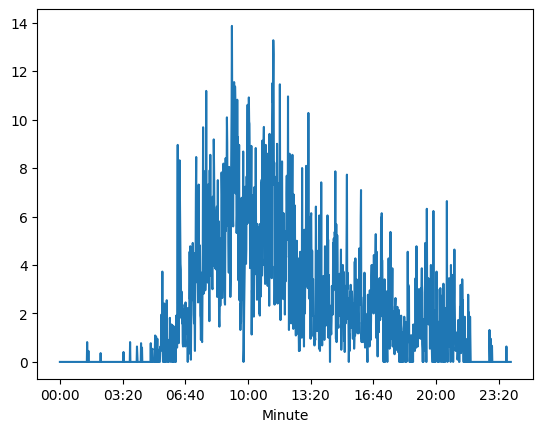

In [ ]:
df_means['Steps'].plot.line()

In [ ]:
# Extract all unique dates
unique_dates = df['Datetime'].dt.date.unique()
unique_dates

array([datetime.date(2016, 6, 22), datetime.date(2016, 6, 23),
       datetime.date(2016, 6, 24), datetime.date(2016, 6, 25),
       datetime.date(2016, 6, 26), datetime.date(2016, 6, 27),
       datetime.date(2016, 6, 28), datetime.date(2016, 6, 29),
       datetime.date(2016, 6, 30), datetime.date(2016, 7, 1),
       datetime.date(2016, 7, 2), datetime.date(2016, 7, 3),
       datetime.date(2016, 7, 4), datetime.date(2016, 7, 5),
       datetime.date(2016, 7, 6), datetime.date(2016, 7, 7),
       datetime.date(2016, 7, 8), datetime.date(2016, 7, 9),
       datetime.date(2016, 7, 10), datetime.date(2016, 7, 11),
       datetime.date(2016, 7, 12), datetime.date(2016, 7, 13),
       datetime.date(2016, 7, 14)], dtype=object)

In [ ]:
# Create an empty list to hold all datetime ranges
all_datetimes = []

# For each unique date, generate a complete datetime range for each minute of the day
for date in unique_dates:
    day_start = pd.to_datetime(date)
    day_end = day_start + pd.DateOffset(days=1) - pd.DateOffset(minutes=1)  # up to 23:59 of the current day
    datetimes = pd.date_range(day_start, day_end, freq='1min')
    all_datetimes.extend(datetimes)

# Convert the list of datetime ranges to a pandas Series or DataFrame if necessary
all_datetimes_series = pd.Series(all_datetimes)

In [ ]:
all_datetimes_df = pd.DataFrame(all_datetimes_series, columns=['Datetime'])

In [ ]:
# Perform a left join on 'Datetime'
merged_df = pd.merge(all_datetimes_df, df, on='Datetime', how='left')

In [ ]:
all_activity = merged_df[['Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']].copy()

In [ ]:
all_activity

,Datetime,Steps,XCnt,YCnt,ZCnt,Calories
0,2016-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN
1,2016-06-22 00:01:00,NaN,NaN,NaN,NaN,NaN
2,2016-06-22 00:02:00,NaN,NaN,NaN,NaN,NaN
3,2016-06-22 00:03:00,NaN,NaN,NaN,NaN,NaN
4,2016-06-22 00:04:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
33115,2016-07-14 23:55:00,NaN,NaN,NaN,NaN,NaN
33116,2016-07-14 23:56:00,NaN,NaN,NaN,NaN,NaN
33117,2016-07-14 23:57:00,NaN,NaN,NaN,NaN,NaN
33118,2016-07-14 23:58:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extract the minute from each timestamp in all_activity
all_activity['Minute'] = all_activity['Datetime'].dt.strftime('%H:%M')
all_activity

,Datetime,Steps,XCnt,YCnt,ZCnt,Calories,Minute
0,2016-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,00:00
1,2016-06-22 00:01:00,NaN,NaN,NaN,NaN,NaN,00:01
2,2016-06-22 00:02:00,NaN,NaN,NaN,NaN,NaN,00:02
3,2016-06-22 00:03:00,NaN,NaN,NaN,NaN,NaN,00:03
4,2016-06-22 00:04:00,NaN,NaN,NaN,NaN,NaN,00:04
...,...,...,...,...,...,...,...
33115,2016-07-14 23:55:00,NaN,NaN,NaN,NaN,NaN,23:55
33116,2016-07-14 23:56:00,NaN,NaN,NaN,NaN,NaN,23:56
33117,2016-07-14 23:57:00,NaN,NaN,NaN,NaN,NaN,23:57
33118,2016-07-14 23:58:00,NaN,NaN,NaN,NaN,NaN,23:58


In [ ]:
# For each missing value in 'Steps' and 'XCnt', replace it with the corresponding mean value from df_means
all_activity['Steps'] = all_activity.apply(lambda row: df_means.loc[row['Minute'], 'Steps'] if pd.isnull(row['Steps']) else row['Steps'], axis=1)

In [ ]:
all_activity

,Datetime,Steps,XCnt,YCnt,ZCnt,Calories,Minute
0,2016-06-22 00:00:00,0.0,NaN,NaN,NaN,NaN,00:00
1,2016-06-22 00:01:00,0.0,NaN,NaN,NaN,NaN,00:01
2,2016-06-22 00:02:00,0.0,NaN,NaN,NaN,NaN,00:02
3,2016-06-22 00:03:00,0.0,NaN,NaN,NaN,NaN,00:03
4,2016-06-22 00:04:00,0.0,NaN,NaN,NaN,NaN,00:04
...,...,...,...,...,...,...,...
33115,2016-07-14 23:55:00,0.0,NaN,NaN,NaN,NaN,23:55
33116,2016-07-14 23:56:00,0.0,NaN,NaN,NaN,NaN,23:56
33117,2016-07-14 23:57:00,0.0,NaN,NaN,NaN,NaN,23:57
33118,2016-07-14 23:58:00,0.0,NaN,NaN,NaN,NaN,23:58


In [ ]:
# Similarly, fill up XCnt, YCnt, ZCnt, and Calories
all_activity['XCnt'] = all_activity.apply(lambda row: df_means.loc[row['Minute'], 'XCnt'] if pd.isnull(row['XCnt']) else row['XCnt'], axis=1)
all_activity['YCnt'] = all_activity.apply(lambda row: df_means.loc[row['Minute'], 'YCnt'] if pd.isnull(row['YCnt']) else row['YCnt'], axis=1)
all_activity['ZCnt'] = all_activity.apply(lambda row: df_means.loc[row['Minute'], 'ZCnt'] if pd.isnull(row['ZCnt']) else row['ZCnt'], axis=1)
all_activity['Calories'] = all_activity.apply(lambda row: df_means.loc[row['Minute'], 'Calories'] if pd.isnull(row['Calories']) else row['Calories'], axis=1)

In [ ]:
all_activity = all_activity.drop('Minute', axis=1)
all_activity

,Datetime,Steps,XCnt,YCnt,ZCnt,Calories
0,2016-06-22 00:00:00,0.0,61.409091,104.863636,70.363636,0.171238
1,2016-06-22 00:01:00,0.0,41.772727,101.590909,36.454545,0.148915
2,2016-06-22 00:02:00,0.0,46.227273,52.772727,43.727273,0.068392
3,2016-06-22 00:03:00,0.0,91.409091,164.772727,112.863636,0.275454
4,2016-06-22 00:04:00,0.0,51.333333,137.666667,71.428571,0.190698
...,...,...,...,...,...,...
33115,2016-07-14 23:55:00,0.0,0.000000,2.545455,0.000000,0.002454
33116,2016-07-14 23:56:00,0.0,11.227273,7.500000,5.272727,0.007231
33117,2016-07-14 23:57:00,0.0,41.590909,51.727273,31.863636,0.049873
33118,2016-07-14 23:58:00,0.0,46.863636,115.818182,43.954545,0.182776


7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

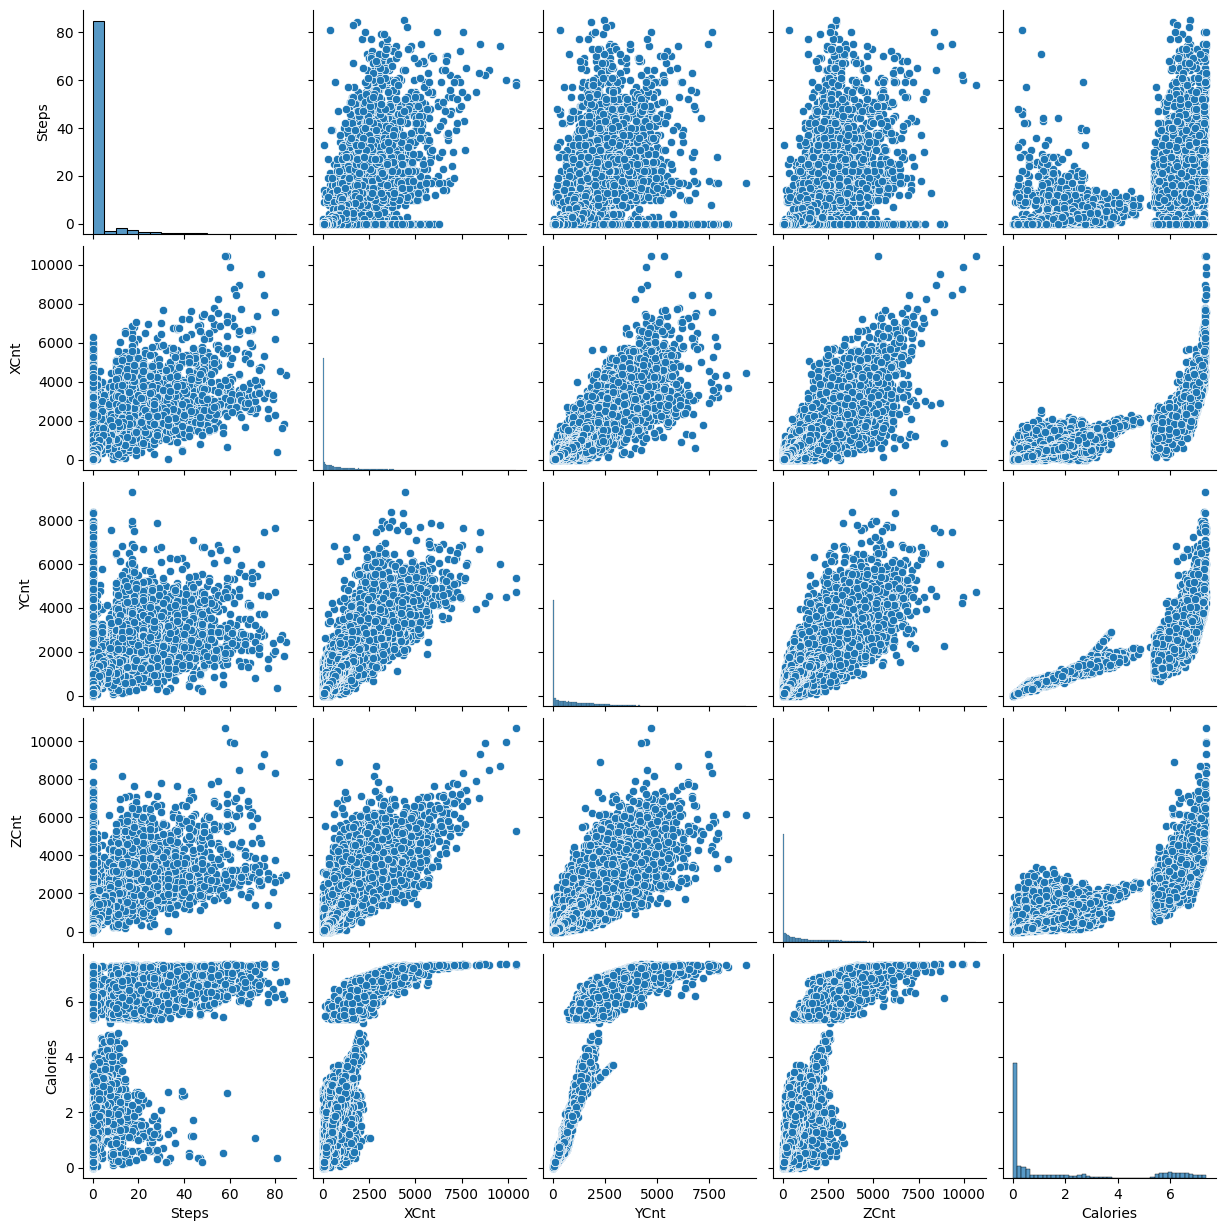

In [ ]:
sns.pairplot(all_activity[['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']])

## Discussion: Insights....